In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Logisztikus regresszió, Lineáris regresszió

In [8]:
CrimeData = pd.read_csv("Crime_Data_from_2010_to_2019.csv")#.head(2000)
CrimeData = CrimeData.drop('Crm Cd', axis=1)
#CrimeData = CrimeData.drop('Crm Cd Desc', axis=1)
CrimeData = CrimeData.drop('Status', axis=1)
CrimeData = CrimeData.drop('Crm Cd 1', axis=1)
CrimeData = CrimeData.drop('Crm Cd 2', axis=1)
CrimeData = CrimeData.drop('Crm Cd 3', axis=1)
CrimeData = CrimeData.drop('Crm Cd 4', axis=1)
CrimeData = CrimeData.drop('Mocodes', axis=1)
CrimeData = CrimeData.drop('Part 1-2', axis=1)
CrimeData = CrimeData.drop('TIME OCC', axis=1)
CrimeData = CrimeData.drop('Date Rptd', axis=1)
CrimeData = CrimeData.drop('DATE OCC', axis=1)
CrimeData = CrimeData.drop('Weapon Used Cd', axis=1)
CrimeData = CrimeData.drop('Cross Street', axis=1)
CrimeData = CrimeData.drop('LAT', axis=1)
CrimeData = CrimeData.drop('LON', axis=1)
CrimeData = CrimeData.drop('Premis Cd', axis=1)
#CrimeData = CrimeData.drop('Premis Desc', axis=1)
#CrimeData = CrimeData.drop('LOCATION', axis=1)
CrimeData = CrimeData.drop('Status Desc', axis=1)
CrimeData = CrimeData.drop('DR_NO', axis=1)
CrimeData = CrimeData.drop('Rpt Dist No', axis=1)
#CrimeData = CrimeData.drop('Weapon Desc', axis=1)
CrimeData = CrimeData.drop('AREA NAME', axis=1)

CrimeData

,AREA,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LOCATION
0,13,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,NaN,300 E GAGE AV
1,14,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,NaN,SEPULVEDA BL
2,13,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,NaN,1300 E 21ST ST
3,6,VIOLATION OF COURT ORDER,47,F,W,STREET,HAND GUN,CAHUENGA BL
4,1,"RAPE, ATTEMPTED",47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",8TH ST
...,...,...,...,...,...,...,...,...
2119792,5,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,14,F,W,PARK/PLAYGROUND,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",100 W 22ND ST
2119793,6,ARSON,0,X,X,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,FIRE,1400 N LA BREA AV
2119794,20,CRIMINAL THREATS - NO WEAPON DISPLAYED,46,F,B,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",6TH
2119795,17,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,STREET,NaN,17200 NAPA ST


Adattípusok:  [dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')]
Hiányzó adatok %:  [0.0, 0.0, 0.0, 9.282303918724292, 9.284473937834612, 0.008821599426737561, 66.39470666294933, 0.0]


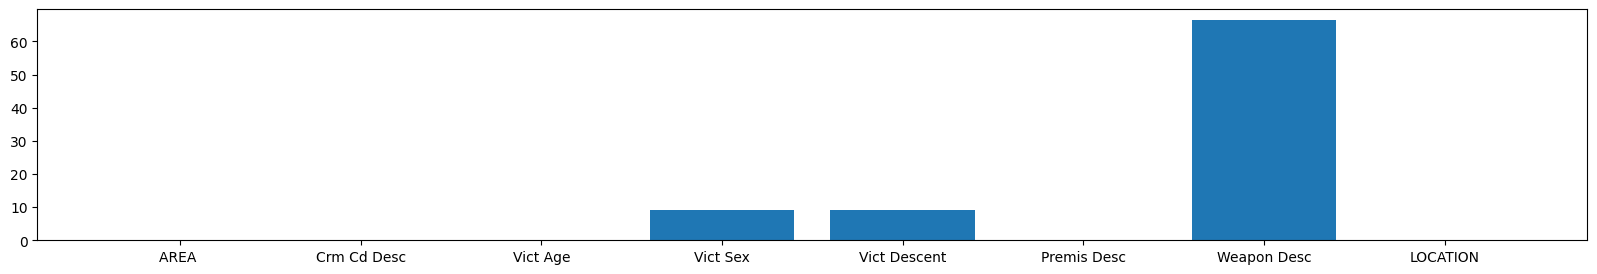

,AREA,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LOCATION
0,13,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,NaN,300 E GAGE AV
1,14,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,NaN,SEPULVEDA BL
2,13,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,NaN,1300 E 21ST ST
3,6,VIOLATION OF COURT ORDER,47,F,W,STREET,HAND GUN,CAHUENGA BL
4,1,"RAPE, ATTEMPTED",47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",8TH ST
...,...,...,...,...,...,...,...,...
2119792,5,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,14,F,W,PARK/PLAYGROUND,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",100 W 22ND ST
2119793,6,ARSON,0,X,X,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,FIRE,1400 N LA BREA AV
2119794,20,CRIMINAL THREATS - NO WEAPON DISPLAYED,46,F,B,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",6TH
2119795,17,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,STREET,NaN,17200 NAPA ST


In [10]:
dtypes = list()
for dtype in CrimeData.dtypes:
    dtypes.append(dtype)

print('Adattípusok: ', dtypes)


crime_values_list = list()
cols_list = list()
for col in CrimeData.columns:
    pct_missing = np.mean(CrimeData[col].isnull())*100
    cols_list.append(col)
    crime_values_list.append(pct_missing)

print('Hiányzó adatok %: ', crime_values_list)


pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = crime_values_list

plt.figure(figsize=(20,3))
plt.bar(pct_missing_df['col'], pct_missing_df['pct_missing'])
plt.show()

CrimeData

In [11]:
copiedData = CrimeData.copy()
copiedData.head(10)
to_be_deleted=[]
for i,row in copiedData.iterrows():
    should_be=False
    for column in copiedData.columns:
        #print(row[column])
        if pd.isnull(row[column]):
            should_be=True
    if(should_be):
        to_be_deleted.append(i)
#print(to_be_deleted)

copiedData.drop(to_be_deleted, axis=0, inplace=True)
copiedData=copiedData.drop(copiedData[copiedData['Vict Sex']=='X'].index)
copiedData=copiedData.drop(copiedData[copiedData['Vict Sex']=='H'].index)
copiedData=copiedData.drop(copiedData[copiedData['Vict Sex']=='N'].index)
copiedData

,AREA,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LOCATION
3,6,VIOLATION OF COURT ORDER,47,F,W,STREET,HAND GUN,CAHUENGA BL
4,1,"RAPE, ATTEMPTED",47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",8TH ST
7,1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",51,M,B,OTHER PREMISE,UNKNOWN WEAPON/OTHER WEAPON,500 CROCKER ST
8,1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",30,M,H,PARKING LOT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",800 W OLYMPIC BL
10,1,BATTERY - SIMPLE ASSAULT,38,F,B,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",900 N BROADWAY
...,...,...,...,...,...,...,...,...
2119788,3,BATTERY - SIMPLE ASSAULT,27,M,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",2600 EXPOSITION PL
2119789,18,CRIMINAL THREATS - NO WEAPON DISPLAYED,18,F,B,PARKING LOT,VERBAL THREAT,1400 E 111TH ST
2119791,9,ROBBERY,30,F,W,STREET,OTHER FIREARM,7600 WILLIS AV
2119792,5,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,14,F,W,PARK/PLAYGROUND,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",100 W 22ND ST


In [12]:
cols=copiedData.columns.drop(['AREA ','Vict Age'])

for column in cols:
    print(f"Column: {column}")
    columnData = copiedData[column]
    uniqueNames = columnData.drop_duplicates()

    #print(f"Num of unique values: {column} = {uniqueNames.count()}")
    indexes = []
    print(uniqueNames)
    #for index, element in enumerate(uniqueNames):
        #print(f"Index: {index} Element: {element}")
  
    for name in columnData:
        index, = np.where(uniqueNames.values == name)
        indexes.append(index[0])
    copiedData[column]=indexes


Column: Crm Cd Desc
3                                   VIOLATION OF COURT ORDER
4                                            RAPE, ATTEMPTED
7             ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
10                                  BATTERY - SIMPLE ASSAULT
11                                                   ROBBERY
                                 ...                        
1522077             EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)
1553659                                       TRAIN WRECKING
1722327         THEFT, COIN MACHINE - GRAND ($950.01 & OVER)
1763216                    DOCUMENT WORTHLESS ($200 & UNDER)
2071954    VEHICLE - MOTORIZED SCOOTERS, BICYCLES, AND WH...
Name: Crm Cd Desc, Length: 131, dtype: object
Column: Vict Sex
3    F
7    M
Name: Vict Sex, dtype: object
Column: Vict Descent
3         W
4         H
7         B
14        A
20        O
478       K
712       I
1814      X
3027      F
5918      C
6544      J
6581      V
7615      P
19639     U
28466     D
5

In [13]:
shiftedData = copiedData.shift

shiftedData

<bound method DataFrame.shift of          AREA   Crm Cd Desc  Vict Age  Vict Sex  Vict Descent  Premis Desc  \
3            6            0        47         0             0            0   
4            1            1        47         0             1            1   
7            1            2        51         1             2            2   
8            1            2        30         1             1            3   
10           1            3        38         0             2            0   
...        ...          ...       ...       ...           ...          ...   
2119788      3            3        27         1             1            7   
2119789     18            8        18         0             2            3   
2119791      9            4        30         0             0            0   
2119792      5           12        14         0             0           27   
2119794     20            8        46         0             2            5   

         Weapon Desc  LOCATION

In [34]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(-1,1))
#scaled_data = scaler.fit(copiedData)
#print(scaled_data.transform(copiedData))


[[-0.5        -1.          0.03703704 ... -1.         -1.
  -1.        ]
 [-1.         -0.98461538  0.03703704 ... -0.99365079 -0.97435897
  -0.99996275]
 [-1.         -0.96923077  0.11111111 ... -0.98730159 -0.94871795
  -0.9999255 ]
 ...
 [-0.2        -0.93846154 -0.27777778 ... -1.         -0.02564103
   1.        ]
 [-0.6        -0.81538462 -0.57407407 ... -0.82857143 -0.97435897
   0.2892051 ]
 [ 0.9        -0.87692308  0.01851852 ... -0.96825397 -0.97435897
  -0.99940401]]


In [14]:
from sklearn.model_selection import train_test_split

targets = copiedData['Vict Sex']
features = copiedData.drop(['Vict Sex'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(
    features, targets, test_size=0.20, random_state=1
)

In [15]:
copiedData

,AREA,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LOCATION
3,6,0,47,0,0,0,0,0
4,1,1,47,0,1,1,1,1
7,1,2,51,1,2,2,2,2
8,1,2,30,1,1,3,1,3
10,1,3,38,0,2,0,1,4
...,...,...,...,...,...,...,...,...
2119788,3,3,27,1,1,7,1,32366
2119789,18,8,18,0,2,3,3,13154
2119791,9,4,30,0,0,0,38,53692
2119792,5,12,14,0,0,27,1,34610


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
model=KMeans(n_clusters=2,max_iter=500,n_init='auto')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
MSE=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"MSE: {MSE}")
print(f"r2: {r2}")
print(y_test[0:10].to_list())
print(y_pred[0:10])

MSE: 0.4947300203677591
r2: -0.9827358385182272
[1, 1, 0, 0, 1, 0, 0, 0, 1, 0]
[0 0 0 0 0 0 1 0 1 1]


In [23]:
targets = copiedData['Vict Sex'].values
features = copiedData.drop(['Vict Sex'],axis=1).values

x_train, x_test, y_train, y_test = train_test_split(
    features, targets, test_size=0.20, random_state=1)

In [24]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import tensorflow as tf

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#AREA, Crm Cd Desc, Vict Age, Vict Sex, Vict Descent, Premis Desc, Weapon Desc, LOCATION
#custom_input = np.array([6,0,47,0,0,0,0]).reshape(1,-1)
#1	2	51	1	2	2	2	2
proba_prediction = clf.predict([[1,2,51,2,2,2,2]])

if(proba_prediction == 0):
    print('Az áldozat nő volt!')
if(proba_prediction == 1):
    print('Az áldozat férfi volt!')

proba_prediction

Accuracy: 0.627255764930422
Az áldozat férfi volt!


array([1], dtype=int64)

In [25]:
import pickle

fileName = 'dtClassifier.sav'
pickle.dump(clf, open(fileName, 'wb'))

In [26]:
targets = copiedData['Vict Sex']
features = copiedData.drop(['Vict Sex'],axis=1)

#Normalize(features)

x_train, x_test, y_train, y_test = train_test_split(
    features, targets, test_size=0.20, random_state=1
)

C:\Users\Bartu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogReg Accuray Score:  0.5936204760073495


Text(0.5, 427.9555555555555, 'Predicted Label')

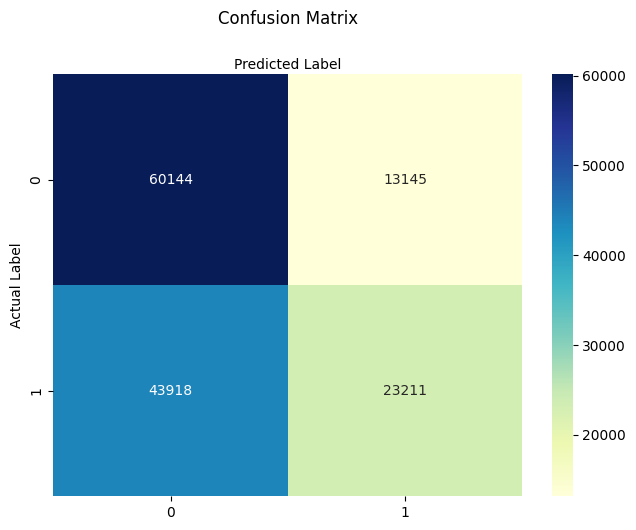

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)

score = logreg.score(x_test,y_test)
print('LogReg Accuray Score: ', score)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

import seaborn as sns

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

#tf.keras.models.save_model(logreg, 'clfModel.hdf5')

In [28]:
from sklearn.metrics import classification_report

target_names = ['Female', 'Male']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Female       0.58      0.82      0.68     73289
        Male       0.64      0.35      0.45     67129

    accuracy                           0.59    140418
   macro avg       0.61      0.58      0.56    140418
weighted avg       0.61      0.59      0.57    140418



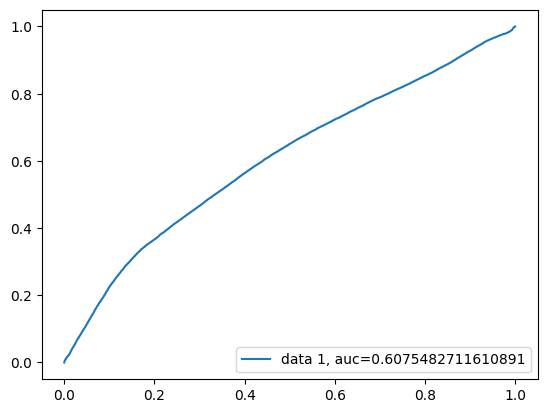

In [29]:
y_pred_proba=logreg.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()